## Modeling

In [1]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
import pandas as pd
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import multilabel_confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np
import pickle
import imblearn as im

In [2]:
infile = open('dummy2.pkl','rb')
df = pickle.load(infile)
infile.close()

I will run model for all pitches that have occured at least 2,000 times in the data

# 4 seam fastball

In [3]:
df1 = df.copy()

In [4]:
df1 = df1[df1.pitch_name == '4-Seam Fastball']

In [5]:
z = df1[['spin_axis', 'release_speed', 'release_spin_rate', 'az', 'ay', 'ax', 'vz0', 'vy0', 'vx0', 'zone','pfx_x', 'pfx_z','description']]

In [6]:
z.dropna(inplace = True)

C:\Users\dmarm\AppData\Local\Temp\ipykernel_21552\2385804610.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z.dropna(inplace = True)


In [7]:
X = z[['spin_axis', 'release_speed', 'release_spin_rate', 'az', 'ay', 'ax', 'vz0', 'vy0', 'vx0', 'zone', 'pfx_x', 'pfx_z']]

In [8]:
y = z[['description']]

In [9]:
y.value_counts()

description
0              417522
1              112524
dtype: int64

To correct for imbalanced classes I will use oversampling.

In [10]:
oversample = im.over_sampling.RandomOverSampler(sampling_strategy='minority')

In [11]:
X_over, y_over = oversample.fit_resample(X, y)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, stratify =y_over, random_state =5)

In [13]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
rf1 = RandomForestClassifier(n_estimators = 10)
rf1.fit(X_train, y_train)

C:\Users\dmarm\AppData\Local\Temp\ipykernel_21552\4194971639.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(X_train, y_train)


RandomForestClassifier(n_estimators=10)

In [16]:
rf1.score(X_train, y_train)

0.9971386737305659

In [18]:
rf1.score(X_test, y_test)

0.9156834849421108

The model has a high accuracy for fastballs but does have some overfitting.

In [20]:
importances = rf1.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf1.estimators_], axis=0)

In [21]:
feature_names = ['spin_axis', 'release_speed', 'release_spin_rate', 'az', 'ay', 'ax', 'vz0', 'vy0', 'vx0', 'zone', 'pfx_x', 'pfx_z']

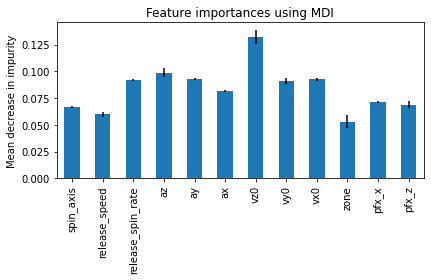

In [22]:
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

The most important information is the velocity and the acceleration particularly the velocity in the z direction which is towards the plate.

## Sinker

In [23]:
df2 = df.copy()

In [24]:
df2 = df2[df2.pitch_name == 'Sinker']

In [25]:
z = df2[['spin_axis', 'release_speed', 'release_spin_rate', 'az', 'ay', 'ax', 'vz0', 'vy0', 'vx0', 'zone','pfx_x', 'pfx_z','description']]

In [26]:
z.dropna(inplace = True)

C:\Users\dmarm\AppData\Local\Temp\ipykernel_21552\2385804610.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z.dropna(inplace = True)


In [27]:
X = z[['spin_axis', 'release_speed', 'release_spin_rate', 'az', 'ay', 'ax', 'vz0', 'vy0', 'vx0', 'zone', 'pfx_x', 'pfx_z']]

In [28]:
y = z[['description']]

In [30]:
oversample = im.over_sampling.RandomOverSampler(sampling_strategy='minority')

In [31]:
X_over, y_over = oversample.fit_resample(X, y)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, stratify =y_over, random_state =5)

In [33]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [34]:
rf2 = RandomForestClassifier(n_estimators = 10)
rf2.fit(X_train, y_train)

C:\Users\dmarm\AppData\Local\Temp\ipykernel_21552\3641827361.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf2.fit(X_train, y_train)


RandomForestClassifier(n_estimators=10)

In [35]:
rf2.score(X_train, y_train)

0.9991043249605873

In [36]:
rf2.score(X_test, y_test)

0.9611924581740938

This model is very accurate but does have some overfitting.

In [37]:
importances = rf2.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf2.estimators_], axis=0)

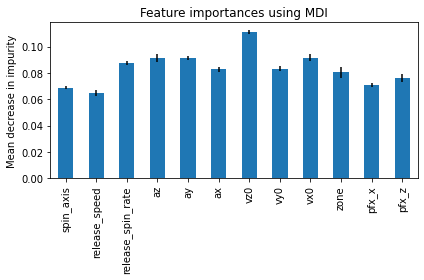

In [38]:
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

There are similar feature importances for fastballs and sinkers. This makes sense since the pitches are similar.

## Slider

In [54]:
df3 = df.copy()

In [55]:
df3 = df3[df3.pitch_name == 'Slider']

In [56]:
z = df3[['spin_axis', 'release_speed', 'release_spin_rate', 'az', 'ay', 'ax', 'vz0', 'vy0', 'vx0', 'zone','pfx_x', 'pfx_z','description']]

In [57]:
z.dropna(inplace = True)

C:\Users\dmarm\AppData\Local\Temp\ipykernel_21552\2385804610.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z.dropna(inplace = True)


In [58]:
X = z[['spin_axis', 'release_speed', 'release_spin_rate', 'az', 'ay', 'ax', 'vz0', 'vy0', 'vx0', 'zone', 'pfx_x', 'pfx_z']]

In [59]:
y = z[['description']]

In [60]:
oversample = im.over_sampling.RandomOverSampler(sampling_strategy='minority')

In [61]:
X_over, y_over = oversample.fit_resample(X, y)

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, stratify =y_over, random_state =5)

In [63]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [64]:
rf3 = RandomForestClassifier(n_estimators = 10)
rf3.fit(X_train, y_train)

C:\Users\dmarm\AppData\Local\Temp\ipykernel_21552\1028156945.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf3.fit(X_train, y_train)


RandomForestClassifier(n_estimators=10)

In [65]:
rf3.score(X_train, y_train)

0.99093070997378

In [66]:
rf3.score(X_test, y_test)

0.8153636019951462

This model is more accurate then the baseline but has more overfitting then the other two models.

In [67]:
importances = rf3.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf3.estimators_], axis=0)

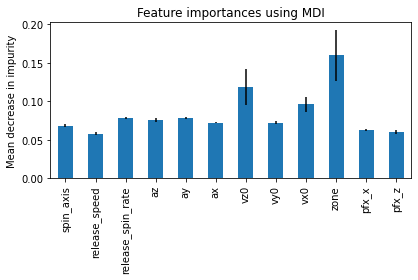

In [68]:
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

For sliders the location of the pitch is more important then the speed. The speed is the secondary factor both speed towards the plate and speed in the horizontal direction.

## Changeup 

In [70]:
df4 = df.copy()

In [71]:
df4 = df4[df4.pitch_name == 'Changeup']

In [72]:
z = df4[['spin_axis', 'release_speed', 'release_spin_rate', 'az', 'ay', 'ax', 'vz0', 'vy0', 'vx0', 'zone','pfx_x', 'pfx_z','description']]

In [73]:
z.dropna(inplace = True)

C:\Users\dmarm\AppData\Local\Temp\ipykernel_21552\2385804610.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z.dropna(inplace = True)


In [74]:
X = z[['spin_axis', 'release_speed', 'release_spin_rate', 'az', 'ay', 'ax', 'vz0', 'vy0', 'vx0', 'zone', 'pfx_x', 'pfx_z']]

In [75]:
y = z[['description']]

In [76]:
oversample = im.over_sampling.RandomOverSampler(sampling_strategy='minority')

In [77]:
X_over, y_over = oversample.fit_resample(X, y)

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, stratify =y_over, random_state =5)

In [79]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [80]:
rf4 = RandomForestClassifier(n_estimators = 10)
rf4.fit(X_train, y_train)

C:\Users\dmarm\AppData\Local\Temp\ipykernel_21552\1359726857.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf4.fit(X_train, y_train)


RandomForestClassifier(n_estimators=10)

In [81]:
rf4.score(X_train, y_train)

0.9931309464884782

In [82]:
rf4.score(X_test, y_test)

0.8274707144035638

Like the slider model this model has some overfitting.

In [84]:
importances = rf4.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf4.estimators_], axis=0)

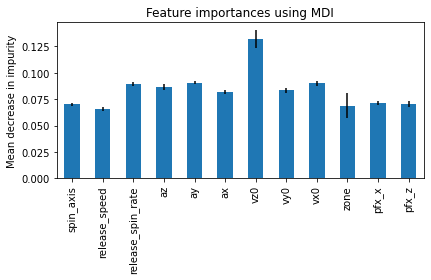

In [85]:
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

Changeups have similar imporance features to fastballs and sinkers. Spin rate is a little more important for changeups than for the other two pitches.

## Curveball 

In [86]:
df5 = df.copy()

In [87]:
df5 = df5[df5.pitch_name == 'Curveball']

In [88]:
z = df5[['spin_axis', 'release_speed', 'release_spin_rate', 'az', 'ay', 'ax', 'vz0', 'vy0', 'vx0', 'zone','pfx_x', 'pfx_z','description']]

In [89]:
z.dropna(inplace = True)

C:\Users\dmarm\AppData\Local\Temp\ipykernel_21552\2385804610.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z.dropna(inplace = True)


In [90]:
X = z[['spin_axis', 'release_speed', 'release_spin_rate', 'az', 'ay', 'ax', 'vz0', 'vy0', 'vx0', 'zone', 'pfx_x', 'pfx_z']]

In [91]:
y = z[['description']]

In [92]:
oversample = im.over_sampling.RandomOverSampler(sampling_strategy='minority')

In [93]:
X_over, y_over = oversample.fit_resample(X, y)

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, stratify =y_over, random_state =5)

In [95]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [96]:
rf5 = RandomForestClassifier(n_estimators = 10)
rf5.fit(X_train, y_train)

C:\Users\dmarm\AppData\Local\Temp\ipykernel_21552\1982775403.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf5.fit(X_train, y_train)


RandomForestClassifier(n_estimators=10)

In [97]:
rf5.score(X_train, y_train)

0.9926313838168505

In [98]:
rf5.score(X_test, y_test)

0.8513791569347124

This model has some overfitting but is more accurate then baseline.

In [100]:
importances = rf5.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf5.estimators_], axis=0)

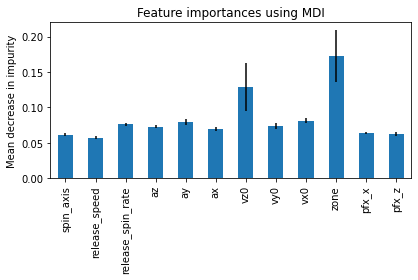

In [101]:
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

For curveballs as with sliders zone is the most important factor.

## Cutter

In [102]:
df6 = df.copy()

In [103]:
df6 = df6[df6.pitch_name == 'Cutter']

In [104]:
z = df6[['spin_axis', 'release_speed', 'release_spin_rate', 'az', 'ay', 'ax', 'vz0', 'vy0', 'vx0', 'zone','pfx_x', 'pfx_z','description']]

In [105]:
z.dropna(inplace = True)

C:\Users\dmarm\AppData\Local\Temp\ipykernel_21552\2385804610.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z.dropna(inplace = True)


In [106]:
X = z[['spin_axis', 'release_speed', 'release_spin_rate', 'az', 'ay', 'ax', 'vz0', 'vy0', 'vx0', 'zone', 'pfx_x', 'pfx_z']]

In [107]:
y = z[['description']]

In [108]:
oversample = im.over_sampling.RandomOverSampler(sampling_strategy='minority')

In [109]:
X_over, y_over = oversample.fit_resample(X, y)

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, stratify =y_over, random_state =5)

In [111]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [112]:
rf6 = RandomForestClassifier(n_estimators = 10)
rf6.fit(X_train, y_train)

C:\Users\dmarm\AppData\Local\Temp\ipykernel_21552\3203100151.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf6.fit(X_train, y_train)


RandomForestClassifier(n_estimators=10)

In [113]:
rf6.score(X_train, y_train)

0.9956902795885847

In [114]:
rf6.score(X_test, y_test)

0.8931442850934377

This model has some overfitting but is more accurate then baseline.

In [116]:
importances = rf6.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf6.estimators_], axis=0)

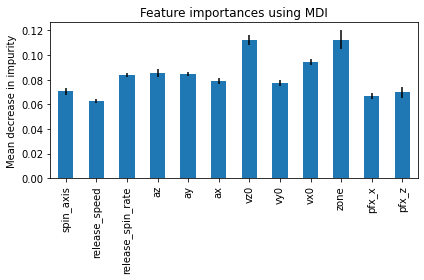

In [117]:
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

For cutters speed and zone are of almost equal importance. Horizontal speed is also important for cutters.

## Knuckle Curve

In [118]:
df7 = df.copy()

In [119]:
df7 = df7[df7.pitch_name == 'Knuckle Curve']

In [120]:
z = df7[['spin_axis', 'release_speed', 'release_spin_rate', 'az', 'ay', 'ax', 'vz0', 'vy0', 'vx0', 'zone','pfx_x', 'pfx_z','description']]

In [121]:
z.dropna(inplace = True)

C:\Users\dmarm\AppData\Local\Temp\ipykernel_21552\2385804610.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z.dropna(inplace = True)


In [122]:
X = z[['spin_axis', 'release_speed', 'release_spin_rate', 'az', 'ay', 'ax', 'vz0', 'vy0', 'vx0', 'zone', 'pfx_x', 'pfx_z']]

In [123]:
y = z[['description']]

In [124]:
oversample = im.over_sampling.RandomOverSampler(sampling_strategy='minority')

In [125]:
X_over, y_over = oversample.fit_resample(X, y)

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, stratify =y_over, random_state =5)

In [127]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [128]:
rf7 = RandomForestClassifier(n_estimators = 10)
rf7.fit(X_train, y_train)

C:\Users\dmarm\AppData\Local\Temp\ipykernel_21552\1187806777.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf7.fit(X_train, y_train)


RandomForestClassifier(n_estimators=10)

In [129]:
rf7.score(X_train, y_train)

0.9918414918414918

In [130]:
rf7.score(X_test, y_test)

0.8447736474052263

This model has some overfitting but is more accurate then baseline.

In [131]:
importances = rf7.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf7.estimators_], axis=0)

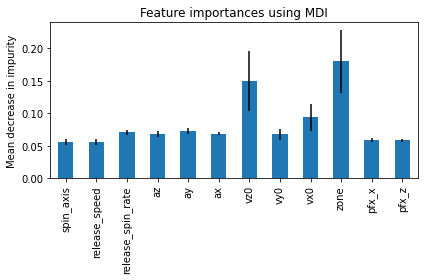

In [133]:
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

Knuckle curves have a very similar feature importance to curveballs. This makes sense since both are types of curveballs. 

## Split-Finger Fastball

In [134]:
df8 = df.copy()

In [135]:
df8 = df8[df8.pitch_name == 'Split-Finger']

In [136]:
z = df8[['spin_axis', 'release_speed', 'release_spin_rate', 'az', 'ay', 'ax', 'vz0', 'vy0', 'vx0', 'zone','pfx_x', 'pfx_z','description']]

In [137]:
z.dropna(inplace = True)

C:\Users\dmarm\AppData\Local\Temp\ipykernel_21552\2385804610.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z.dropna(inplace = True)


In [138]:
X = z[['spin_axis', 'release_speed', 'release_spin_rate', 'az', 'ay', 'ax', 'vz0', 'vy0', 'vx0', 'zone', 'pfx_x', 'pfx_z']]

In [139]:
y = z[['description']]

In [140]:
oversample = im.over_sampling.RandomOverSampler(sampling_strategy='minority')

In [141]:
X_over, y_over = oversample.fit_resample(X, y)

In [142]:
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, stratify =y_over, random_state =5)

In [143]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [144]:
rf8 = RandomForestClassifier(n_estimators = 10)
rf8.fit(X_train, y_train)

C:\Users\dmarm\AppData\Local\Temp\ipykernel_21552\754636821.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf8.fit(X_train, y_train)


RandomForestClassifier(n_estimators=10)

In [145]:
rf8.score(X_train, y_train)

0.9903751233958539

In [147]:
rf8.score(X_test, y_test)

0.793558736426456

This model is the least accurate and most overfit yet but still easily beats the 50% baseline.

In [148]:
importances = rf8.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf8.estimators_], axis=0)

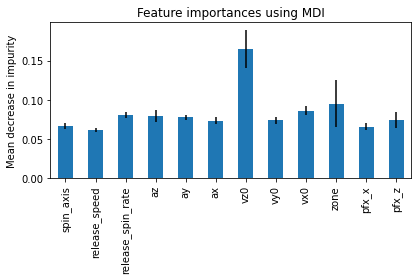

In [149]:
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

For splitters speed is the most important feature with zone a distant second.

## Knuckleball

In [150]:
df9 = df.copy()

In [151]:
df9 = df9[df9.pitch_name == 'Knuckleball']

In [152]:
z = df9[['spin_axis', 'release_speed', 'release_spin_rate', 'az', 'ay', 'ax', 'vz0', 'vy0', 'vx0', 'zone','pfx_x', 'pfx_z','description']]

In [153]:
z.dropna(inplace = True)

C:\Users\dmarm\AppData\Local\Temp\ipykernel_21552\2385804610.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  z.dropna(inplace = True)


In [154]:
X = z[['spin_axis', 'release_speed', 'release_spin_rate', 'az', 'ay', 'ax', 'vz0', 'vy0', 'vx0', 'zone', 'pfx_x', 'pfx_z']]

In [155]:
y = z[['description']]

In [156]:
oversample = im.over_sampling.RandomOverSampler(sampling_strategy='minority')

In [157]:
X_over, y_over = oversample.fit_resample(X, y)

In [158]:
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, stratify =y_over, random_state =5)

In [159]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [160]:
rf9 = RandomForestClassifier(n_estimators = 10)
rf9.fit(X_train, y_train)

C:\Users\dmarm\AppData\Local\Temp\ipykernel_21552\3774098392.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf9.fit(X_train, y_train)


RandomForestClassifier(n_estimators=10)

In [161]:
rf9.score(X_train, y_train)

0.9942528735632183

In [162]:
rf9.score(X_test, y_test)

0.9137931034482759

This model is accurate with only slight overfitting.

In [166]:
importances = rf9.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf9.estimators_], axis=0)

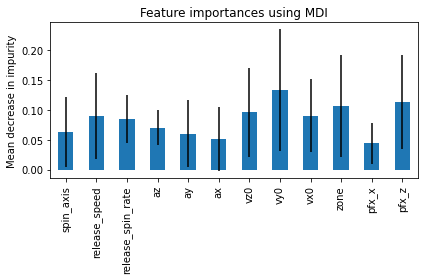

In [167]:
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

Speed is the most important factor followed by zone and vertical movement.

For each pitch the random forest model had the highest accuracy. Notebook 4 and 5 contain the other models that were used. The README contains the conclusion and future work sections.